In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# ask
#1. ranking cities by number of customers customers - top 20
#2. product category wise customer rating
#3. popular payment types
#4. number of installment popularity
#5. average delivery time in days
#6. customers average review for early and late delivery

In [4]:
# prepare

# acquire data frames
df_cust = pd.read_csv('olist_customers_dataset.csv')
df_geo = pd.read_csv('olist_geolocation_dataset.csv')
df_order = pd.read_csv('olist_order_items_dataset.csv')
df_pay = pd.read_csv('olist_order_payments_dataset.csv')
df_review = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_category = pd.read_csv('product_category_name_translation.csv')


In [5]:
############################---merge related data-----#########################

# df_pay, df_orders and df_order have order_id column in common. hence we can merge this dataframes
data = pd.merge(df_orders, df_pay, on='order_id')
data = pd.merge(df_order, data, on='order_id')

# the seller_id column of data dataframe is same as seller_id column of sellers dataframe...... merge
data = pd.merge(df_sellers, data, on='seller_id')

# merge df_products and data on product_id
data = pd.merge(data,df_products, on='product_id')

# merge df_review and data on order_id
data = pd.merge(df_review, data, on='order_id')

data

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_zip_code_prefix,seller_city,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,...,8,397.26,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,...,8,397.26,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8e6d7754bc7e0f22c96d255ebda59eba,12233,sao jose dos campos,...,1,88.09,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,a1043bafd471dff536d0c462352beb48,37175,ilicinea,...,1,194.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,a1043bafd471dff536d0c462352beb48,37175,ilicinea,...,1,222.84,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,46dc3b2cc0980fb8ec44634e21d2718e,22240,rio de janeiro,...,1,209.76,brinquedos,51.0,465.0,1.0,2363.0,23.0,27.0,19.0
118311,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,17ca9b9e9b9ef8fdb529001b49ebb50f,32677,betim,...,6,231.56,papelaria,45.0,283.0,3.0,4100.0,40.0,37.0,29.0
118312,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,8d956fec2e4337affcb520f56fd8cbfd,9780,sao bernardo do campo,...,1,66.41,esporte_lazer,58.0,998.0,5.0,600.0,16.0,10.0,11.0
118313,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,25cf099de44674fde97473224f9d59ab,6716,cotia,...,1,17.78,automotivo,58.0,954.0,1.0,200.0,20.0,15.0,15.0


In [6]:
############################---unrelated data-----#########################
print(df_category.head())
print('\n')
print(df_cust.head())
print('\n')
print(df_geo.head())

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118315 entries, 0 to 118314
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      118315 non-null  object 
 1   order_id                       118315 non-null  object 
 2   review_score                   118315 non-null  int64  
 3   review_comment_title           14089 non-null   object 
 4   review_comment_message         50665 non-null   object 
 5   review_creation_date           118315 non-null  object 
 6   review_answer_timestamp        118315 non-null  object 
 7   seller_id                      118315 non-null  object 
 8   seller_zip_code_prefix         118315 non-null  int64  
 9   seller_city                    118315 non-null  object 
 10  seller_state                   118315 non-null  object 
 11  order_item_id                  118315 non-null  int64  
 12  product_id                    

In [8]:
data.describe()

,review_score,seller_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,118315.000000,116606.000000,116606.000000,116606.000000,118295.000000,118295.000000,118295.000000,118295.000000
mean,4.014554,24440.790703,1.196509,120.651027,20.033024,1.094062,2.943498,172.575651,48.767782,785.944008,2.205144,2112.331011,30.265227,16.620009,23.075075
std,1.400186,27571.679456,0.699452,184.109626,15.836523,0.728555,2.778022,267.104661,10.033375,652.578636,1.717429,3786.717861,16.189038,13.453941,11.749311
min,1.000000,1001.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,3.000000,6429.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,5.000000,13660.000000,1.000000,74.900000,16.280000,1.000000,2.000000,108.200000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,5.000000,27946.500000,1.000000,134.900000,21.180000,1.000000,4.000000,189.260000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,5.000000,99730.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [9]:
data.shape

(118315, 35)

In [10]:
data.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'seller_id', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'order_item_id', 'product_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [11]:
# number of unique values
data.nunique()

review_id                        98452
order_id                         98665
review_score                         5
review_comment_title              4569
review_comment_message           36434
review_creation_date               633
review_answer_timestamp          98290
seller_id                         3095
seller_zip_code_prefix            2246
seller_city                        611
seller_state                        23
order_item_id                       21
product_id                       32951
shipping_limit_date              93317
price                             5968
freight_value                     6999
customer_id                      98665
order_status                         7
order_purchase_timestamp         98111
order_approved_at                90173
order_delivered_carrier_date     81016
order_delivered_customer_date    95663
order_estimated_delivery_date      449
payment_sequential                  29
payment_type                         4
payment_installments     

In [12]:
# number of null data
data.isnull().sum()

review_id                             0
order_id                              0
review_score                          0
review_comment_title             104226
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
seller_id                             0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0
order_item_id                         0
product_id                            0
shipping_limit_date                   0
price                                 0
freight_value                         0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
payment_sequential                    0
payment_type                          0


In [13]:
# drop unrelevant columns
data = data.drop(columns=['review_comment_title', 'product_weight_g',
                   'product_length_cm','product_height_cm', 'product_width_cm'
                  ,'product_description_lenght', 'product_photos_qty',
                  'order_purchase_timestamp', 'order_status', 'order_approved_at',
                  'payment_sequential', 'product_name_lenght'])
data

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_zip_code_prefix,seller_city,seller_state,...,price,freight_value,customer_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP,...,185.00,13.63,41dcb106f807e993532d446263290104,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,credit_card,8,397.26,esporte_lazer
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP,...,185.00,13.63,41dcb106f807e993532d446263290104,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,credit_card,8,397.26,esporte_lazer
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8e6d7754bc7e0f22c96d255ebda59eba,12233,sao jose dos campos,SP,...,79.79,8.30,8a2e7ef9053dea531e4dc76bd6d853e6,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,credit_card,1,88.09,informatica_acessorios
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG,...,149.00,45.12,e226dfed6544df5b7b87a48208690feb,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,credit_card,1,194.12,informatica_acessorios
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG,...,179.99,42.85,de6dff97e5f1ba84a3cd9a3bc97df5f6,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,credit_card,1,222.84,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,46dc3b2cc0980fb8ec44634e21d2718e,22240,rio de janeiro,RJ,...,199.99,9.77,d0d7086dea6fcf42b9b690b9f3745c58,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00,credit_card,1,209.76,brinquedos
118311,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,17ca9b9e9b9ef8fdb529001b49ebb50f,32677,betim,MG,...,215.97,15.59,fcc7b1caafe3b77fd587bab964c4d1fb,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00,credit_card,6,231.56,papelaria
118312,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,8d956fec2e4337affcb520f56fd8cbfd,9780,sao bernardo do campo,SP,...,50.95,15.46,3aa00401736823c73e9fe8683328fa6b,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00,credit_card,1,66.41,esporte_lazer
118313,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,25cf099de44674fde97473224f9d59ab,6716,cotia,SP,...,10.00,7.78,8df587ce8a11ee97b3de9ef3405245c2,2017-12-12 18:05:41,2017-12-14 22:04:30,2017-12-29 00:00:00,boleto,1,17.78,automotivo


In [14]:
# drop rows having null
data = data.dropna(how='any', subset=['order_delivered_carrier_date', 'order_delivered_customer_date', 'product_category_name'])
data

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_zip_code_prefix,seller_city,seller_state,...,price,freight_value,customer_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP,...,185.00,13.63,41dcb106f807e993532d446263290104,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,credit_card,8,397.26,esporte_lazer
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,6d803cb79cc31c41c4c789a75933b3c7,14600,sao joaquim da barra,SP,...,185.00,13.63,41dcb106f807e993532d446263290104,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00,credit_card,8,397.26,esporte_lazer
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8e6d7754bc7e0f22c96d255ebda59eba,12233,sao jose dos campos,SP,...,79.79,8.30,8a2e7ef9053dea531e4dc76bd6d853e6,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00,credit_card,1,88.09,informatica_acessorios
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG,...,149.00,45.12,e226dfed6544df5b7b87a48208690feb,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00,credit_card,1,194.12,informatica_acessorios
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,a1043bafd471dff536d0c462352beb48,37175,ilicinea,MG,...,179.99,42.85,de6dff97e5f1ba84a3cd9a3bc97df5f6,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00,credit_card,1,222.84,ferramentas_jardim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,46dc3b2cc0980fb8ec44634e21d2718e,22240,rio de janeiro,RJ,...,199.99,9.77,d0d7086dea6fcf42b9b690b9f3745c58,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00,credit_card,1,209.76,brinquedos
118311,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,17ca9b9e9b9ef8fdb529001b49ebb50f,32677,betim,MG,...,215.97,15.59,fcc7b1caafe3b77fd587bab964c4d1fb,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00,credit_card,6,231.56,papelaria
118312,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,8d956fec2e4337affcb520f56fd8cbfd,9780,sao bernardo do campo,SP,...,50.95,15.46,3aa00401736823c73e9fe8683328fa6b,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00,credit_card,1,66.41,esporte_lazer
118313,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,25cf099de44674fde97473224f9d59ab,6716,cotia,SP,...,10.00,7.78,8df587ce8a11ee97b3de9ef3405245c2,2017-12-12 18:05:41,2017-12-14 22:04:30,2017-12-29 00:00:00,boleto,1,17.78,automotivo


In [74]:
# remove duplicate rows
data.drop_duplicates(keep='first', inplace=False, ignore_index=False)
data.tail()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,seller_id,seller_zip_code_prefix,seller_city,seller_state,...,price,freight_value,customer_id,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,payment_value,product_category_name
118310,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,46dc3b2cc0980fb8ec44634e21d2718e,22240,rio de janeiro,RJ,...,199.99,9.77,d0d7086dea6fcf42b9b690b9f3745c58,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20 00:00:00,credit_card,1,209.76,brinquedos
118311,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,17ca9b9e9b9ef8fdb529001b49ebb50f,32677,betim,MG,...,215.97,15.59,fcc7b1caafe3b77fd587bab964c4d1fb,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06 00:00:00,credit_card,6,231.56,papelaria
118312,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,8d956fec2e4337affcb520f56fd8cbfd,9780,sao bernardo do campo,SP,...,50.95,15.46,3aa00401736823c73e9fe8683328fa6b,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16 00:00:00,credit_card,1,66.41,esporte_lazer
118313,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,25cf099de44674fde97473224f9d59ab,6716,cotia,SP,...,10.00,7.78,8df587ce8a11ee97b3de9ef3405245c2,2017-12-12 18:05:41,2017-12-14 22:04:30,2017-12-29 00:00:00,boleto,1,17.78,automotivo
118314,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49,7e3f87d16fb353f408d467e74fbd8014,4809,sao paulo,SP,...,32.90,7.78,f6fff47846276bed044b63474bd38884,2017-06-30 13:53:54,2017-07-02 09:44:54,2017-07-12 00:00:00,boleto,1,40.68,informatica_acessorios


In [16]:
data.isnull().sum()

review_id                            0
order_id                             0
review_score                         0
review_comment_message           65854
review_creation_date                 0
review_answer_timestamp              0
seller_id                            0
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
order_item_id                        0
product_id                           0
shipping_limit_date                  0
price                                0
freight_value                        0
customer_id                          0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
payment_type                         0
payment_installments                 0
payment_value                        0
product_category_name                0
dtype: int64

In [128]:
#1. ranking cities by number of customers customers - top 20
city_rank = df_cust.groupby('customer_city', as_index=False).customer_state.count()

#2. product category wise customer rating
rating = data.groupby('product_category_name', as_index=False).review_score.mean().reset_index()
rating = rating.drop(columns=['index'])
rating_pie = rating.round({'review_score':1})
rating_pie = rating_pie.groupby('review_score', as_index=False).count()

#3. popular payment types
payment_fav = data.groupby('payment_type', as_index=False).payment_value.count()
payment_fav = payment_fav.rename(columns={"payment_value":"No_Of_Trans"})

#4. number of installment popularity
install_fav = data.groupby('payment_installments', as_index=False).price.count()
install_fav = install_fav.rename(columns={'price':'No_Of_Cust'})

#5. average delivery time in days 
pd.options.mode.chained_assignment = None  # default='warn'
data['dispatch'] = pd.to_datetime(data['order_delivered_carrier_date'])
data['delivered'] = pd.to_datetime(data['order_delivered_customer_date'])
data['days'] = (data['delivered'] - data['dispatch']).dt.days

#6. customers average review for early and late delivery
review_del = data.groupby('review_score', as_index=False).days.mean()
review_del = review_del.round({'days':0})

,review_score,days
0,1,15.0
1,2,11.0
2,3,10.0
3,4,9.0
4,5,7.0


In [37]:
# analyse

#1. ranking cities by number of customers customers - top 20
city_rank = city_rank.sort_values('customer_state', ascending=False)[0:20]
city_rank


,customer_city,customer_state
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


In [38]:
#2. product category wise customer rating
rating

,product_category_name,review_score
0,agro_industria_e_comercio,4.227642
1,alimentos,4.217476
2,alimentos_bebidas,4.387900
3,artes,4.053140
4,artes_e_artesanato,4.125000
...,...,...
68,sinalizacao_e_seguranca,4.050251
69,tablets_impressao_imagem,4.045977
70,telefonia,3.988496
71,telefonia_fixa,3.744275


In [66]:
#3. popular payment types
payment_fav

,payment_type,No_Of_Trans
0,boleto,22203
1,credit_card,84184
2,debit_card,1633
3,voucher,6068


In [85]:
#4. number of installment popularity
install_fav

,payment_installments,No_Of_Cust
0,0,3
1,1,56824
2,2,13244
3,3,11403
4,4,7756
5,5,5863
6,6,4491
7,7,1752
8,8,4914
9,9,705


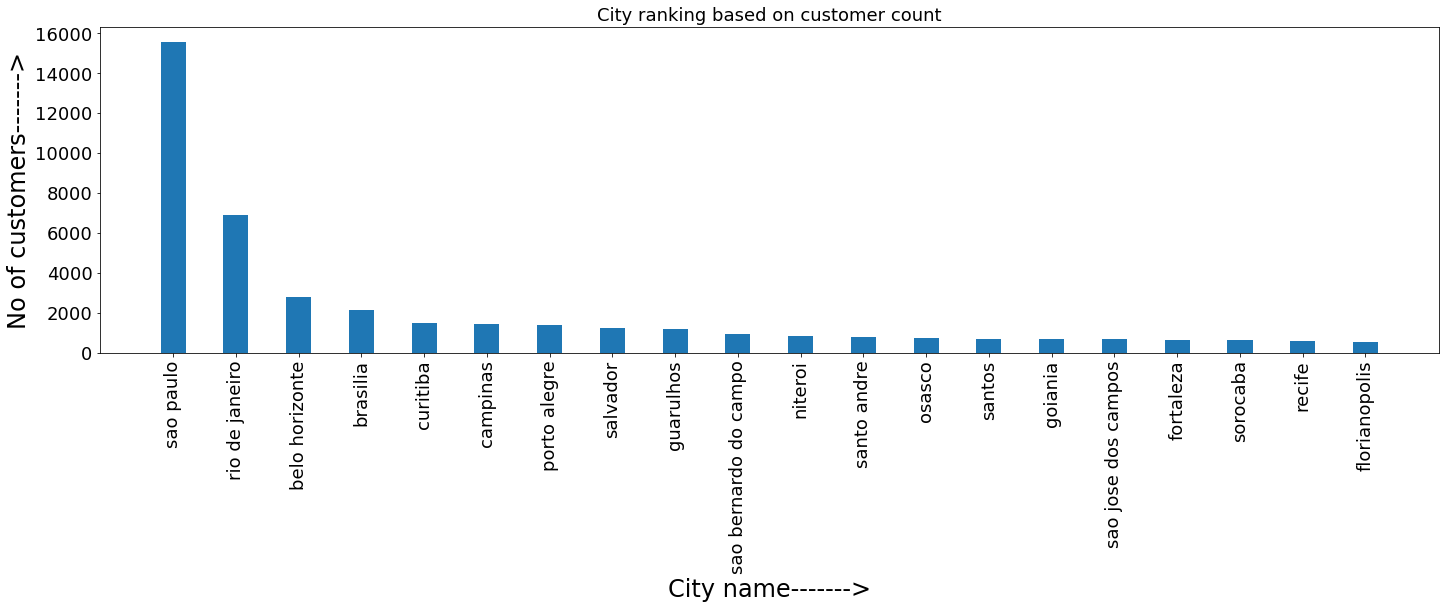

In [39]:
# visualize
#1. ranking cities by number of customers customers - top 20
f = plt.figure()
f.set_figwidth(24)
f.set_figheight(6)
plt.bar(city_rank['customer_city'], city_rank['customer_state'], width = 0.4)
plt.ylabel('No of customers------->', fontsize=24)
plt.xlabel('City name------->', fontsize=24)
plt.title('City ranking based on customer count', size=18)
plt.xticks(fontsize=18, rotation='90')
plt.yticks(fontsize=18)
plt.show()

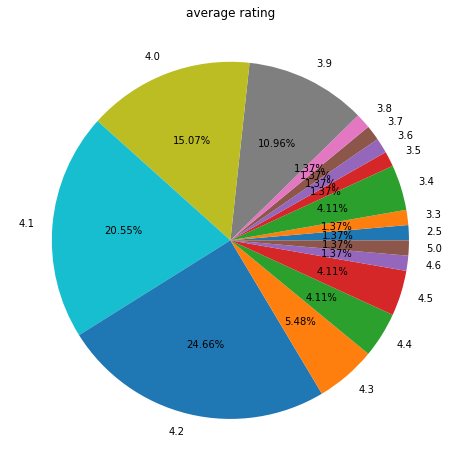

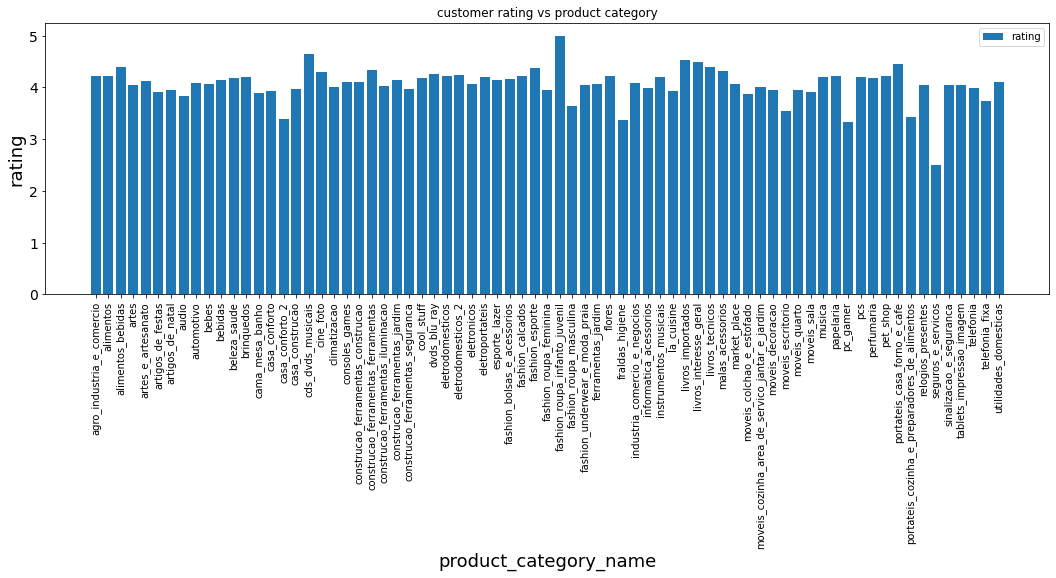

In [107]:
#2. product category wise customer rating
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.pie(rating_pie['product_category_name'], labels = rating_pie['review_score'], autopct='%0.2f%%')
plt.title('average rating')
plt.show()

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(5)
plt.bar(rating['product_category_name'], rating['review_score'], label='rating')
plt.legend()
plt.xlabel('product_category_name', fontsize=18)
plt.ylabel('rating', fontsize=18)
plt.title('customer rating vs product category')
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
plt.show()

# more than 50% of the product category got rating between 4 to 5. the lowest average rating was 2.5 and highest was 5

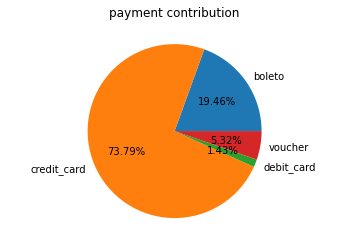

In [108]:
#3. popular payment types
plt.axis('equal')
plt.pie(payment_fav['No_Of_Trans'], labels = payment_fav['payment_type'], autopct='%0.2f%%')
plt.title('payment contribution')
plt.show()

# credit card payment is most popular

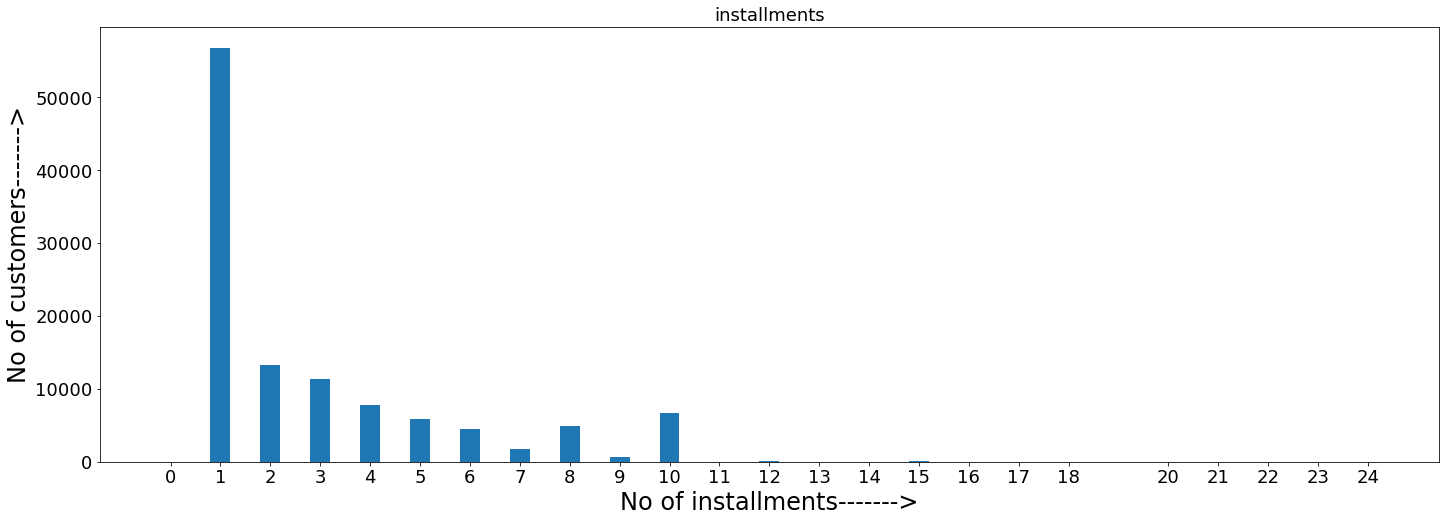

In [98]:
#4. number of installment popularity
fig = plt.gcf()
fig.set_size_inches(24,8)

plt.bar(install_fav['payment_installments'], install_fav['No_Of_Cust'], width = 0.4)
plt.ylabel('No of customers------->', fontsize=24)
plt.xlabel('No of installments------->', fontsize=24)
plt.title('installments', size=18)
plt.xticks(install_fav['payment_installments'], fontsize=18, rotation='0')
plt.yticks(fontsize=18)
plt.show()

# from the graph it has been seen that customers like to buy product in less number of installments preferably between 1 to 8

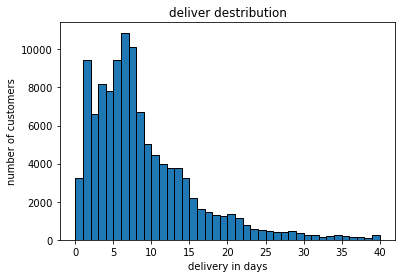

In [121]:
#5. average delivery time in days
b = np.arange(0, data['days'].max()/5,1)
plt.hist(data['days'], bins=b, edgecolor='black')
plt.ylabel('number of customers')
plt.xlabel('delivery in days')
plt.title('deliver destribution')
plt.show()

# from the graph it is clear that most people get their product delivered within 0 to 15 working days

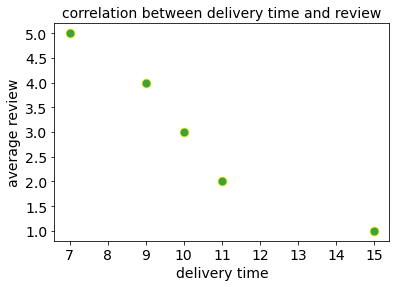

In [142]:
#6. customers average review for early and late delivery
plt.scatter(review_del['days'], review_del['review_score'], s=80, edgecolor='yellow', color='green', alpha=0.75)
plt.title('correlation between delivery time and review', size=14)
plt.xlabel('delivery time', fontsize=14)
plt.ylabel('average review', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# the customer review is corellated with delivery time 
# if delivery time is more then customer tends to give bad review and visa versa